<a href="https://colab.research.google.com/github/jaimevt88/DL012020/blob/master/U4.proyect.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=18cyWOHXhenkCD1Fiyct-_7pZXRfnK2Yv' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=18cyWOHXhenkCD1Fiyct-_7pZXRfnK2Yv" -O data2D.zip && rm -rf /tmp/cookies.txt
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1q_NULDeoIHmZTPeMCiGMFOnxP5v0o4vf' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1q_NULDeoIHmZTPeMCiGMFOnxP5v0o4vf" -O data1D.zip && rm -rf /tmp/cookies.txt
!unzip data2D.zip
!unzip data1D.zip
!rm -rf data*.zip
!mkdir 1D
!mkdir 2D

--2020-05-03 03:44:56--  https://docs.google.com/uc?export=download&confirm=HvPs&id=18cyWOHXhenkCD1Fiyct-_7pZXRfnK2Yv
Resolving docs.google.com (docs.google.com)... 74.125.203.113, 74.125.203.100, 74.125.203.102, ...
Connecting to docs.google.com (docs.google.com)|74.125.203.113|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-10-4k-docs.googleusercontent.com/docs/securesc/2d2i9c4pjd8noh2kmtrrgddb5s319ckl/s3t06c5kusr0pq0ce89hkg9jm0l316cu/1588477425000/13158967983899698144/12760646577352524255Z/18cyWOHXhenkCD1Fiyct-_7pZXRfnK2Yv?e=download [following]
--2020-05-03 03:44:56--  https://doc-10-4k-docs.googleusercontent.com/docs/securesc/2d2i9c4pjd8noh2kmtrrgddb5s319ckl/s3t06c5kusr0pq0ce89hkg9jm0l316cu/1588477425000/13158967983899698144/12760646577352524255Z/18cyWOHXhenkCD1Fiyct-_7pZXRfnK2Yv?e=download
Resolving doc-10-4k-docs.googleusercontent.com (doc-10-4k-docs.googleusercontent.com)... 64.233.188.132, 2404:6800:4008:c06::84
Connecting

# **Gender recognition through speech**

In [0]:
import tensorflow as tf
from time import time
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import Image
import h5py
from sklearn.model_selection import train_test_split
import pickle
import os
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.utils.multiclass import unique_labels
from tensorflow.keras.callbacks import ModelCheckpoint

In [0]:
def barplot_model(labels,train,test,ylabel='Accuracy',
                       title='Accuracy obtained in each architecture', 
                  lab1='Acc. train',lab2='Acc. test'): 
    x = np.arange(len(labels))  # the label locations
    width = 0.35  # the width of the bars

    fig, ax = plt.subplots(figsize=(10,7))
    rects1 = ax.bar(x - width/2, train, width, label=lab1)
    rects2 = ax.bar(x + width/2, test, width, label=lab2)

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel(ylabel)
    ax.set_title(title)
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.legend()
    
    def autolabel(rects):
        for rect in rects:
            height = rect.get_height()
            ax.annotate('{:.2f}'.format(height),
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom')
    autolabel(rects1)
    autolabel(rects2)
    fig.tight_layout()
    plt.show()

In [0]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax
    

# **2D convolution over spectrograms**

The amount of neurons of the last 2 fully-connected layers is configurable. Three different values are tested in this exercise. Batch normalization is an additional parameter that could be selected.

A first try was made wit more complex convolutional models, but accuracies in validation and train did nos reach more than 50%

(999, 40, 100, 3) (999,) (250, 40, 100, 3) (250,)

distribution of train classes
1    520
0    479
dtype: int64

distribution of test classes
1    130
0    120
dtype: int64
using 2 classes
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 40, 100, 3)]      0         
_________________________________________________________________
conv2d (Conv2D)              (None, 17, 47, 32)        4736      
_________________________________________________________________
activation (Activation)      (None, 17, 47, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 43, 64)        51264     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 41, 128)       73856     
_________________________________________________________________
conv

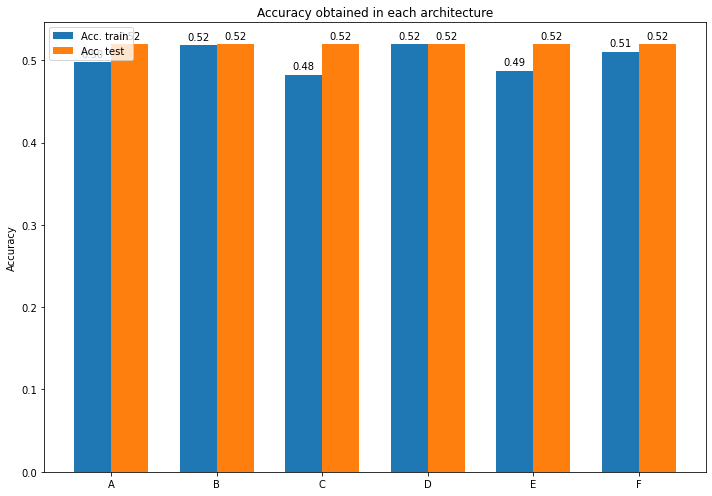

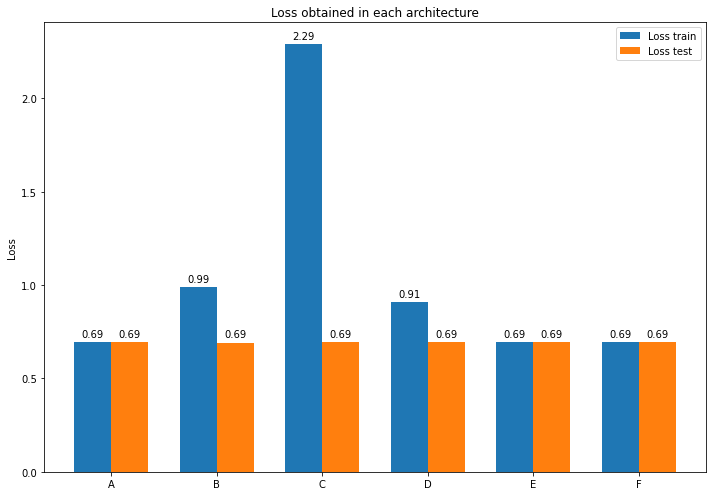

In [6]:

def barplot_model(labels,train,test,ylabel='Accuracy',
                       title='Accuracy obtained in each architecture', 
                  lab1='Acc. train',lab2='Acc. test'): 
    x = np.arange(len(labels))  # the label locations
    width = 0.35  # the width of the bars

    fig, ax = plt.subplots(figsize=(10,7))
    rects1 = ax.bar(x - width/2, train, width, label=lab1)
    rects2 = ax.bar(x + width/2, test, width, label=lab2)

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel(ylabel)
    ax.set_title(title)
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.legend()
    
    def autolabel(rects):
        for rect in rects:
            height = rect.get_height()
            ax.annotate('{:.2f}'.format(height),
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom')
    autolabel(rects1)
    autolabel(rects2)
    fig.tight_layout()
    plt.show()

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


def get_conv_model_2DL(num_classes,bn=False,neurons=[256,64],compile=True):
    print("using",num_classes,"classes")
    inputs = tf.keras.Input(shape=(40,100,3), name="input_1")
    layers = tf.keras.layers.Conv2D(32,(7,7),  strides=2)(inputs)
    if bn:
        layers = tf.keras.layers.BatchNormalization()(layers)
    layers = tf.keras.layers.Activation('relu')(layers)
    layers = tf.keras.layers.Conv2D(64,(5,5), strides=1,activation="relu")(layers)
    layers = tf.keras.layers.Conv2D(128,(3,3), strides=1,activation="relu")(layers)
    layers = tf.keras.layers.Conv2D(256,(3,3), strides=1,activation="relu")(layers)
    layers = tf.keras.layers.Conv2D(256,(3,3), strides=1,activation="relu")(layers)
    layers = tf.keras.layers.Flatten()(layers)
    layers = tf.keras.layers.Dense(neurons[0], activation=tf.nn.relu)(layers)
    layers = tf.keras.layers.Dense(neurons[1], activation=tf.nn.relu)(layers)
    layers = tf.keras.layers.Dropout(0.2)(layers)
    predictions = tf.keras.layers.Dense(num_classes, activation=tf.nn.softmax, name="output_1")(layers)
    model = tf.keras.Model(inputs = inputs, outputs=predictions)
    if compile:
        model.compile(optimizer='adam',
                      loss='sparse_categorical_crossentropy',
                      metrics=['accuracy'])
    return model
  

def train2DL(model, batch_size, epochs, model_name=""):
    tensorboard = tf.keras.callbacks.TensorBoard(log_dir="2DL/logs/"+model_name+"_"+"{}".format(time()))
    model.reset_states()
    history = model.fit(x_train, y_train, epochs=epochs, callbacks=[tensorboard],
              batch_size=batch_size,
              validation_data=(x_test, y_test))
    metrics = model.evaluate(x_test, y_test)
    return {k:v for k,v in zip (model.metrics_names, metrics)}, history.history

with open('data.pkl','rb') as g: 
    y_train_gender, x_train_gender = pickle.load(g)

models2DL = {'A':{'bn':False,'layers':[1024,256],'acc':0,'t':0},'B':{'bn':True,'layers':[1024,256],'acc':0,'t':0},
          'C':{'bn':False,'layers':[512,128],'acc':0,'t':0},'D':{'bn':True,'layers':[512,128],'acc':0,'t':0},
          'E':{'bn':False,'layers':[256,64],'acc':0,'t':0},'F':{'bn':True,'layers':[256,64],'acc':0,'t':0}}

x_train, x_test, y_train, y_test = train_test_split(x_train_gender, y_train_gender, test_size=.20,stratify=y_train_gender)
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)
print("\ndistribution of train classes")
print(pd.Series(y_train).value_counts())
print("\ndistribution of test classes")
print(pd.Series(y_test).value_counts())

for key in models2DL:
    start_time = time()
    modelX = get_conv_model_2DL(2,models2DL[key]['bn'],models2DL[key]['layers'])
    print(modelX.summary())
    results, models2DL[key]['acc'] = train2DL(modelX, batch_size=32, epochs=15, model_name=key)
    models2DL[key]['t'] = time() - start_time

labels=[]
at2l=[]
lt2l=[]
av2l=[]
lv2l=[]
t2dl=[]
for key in models2DL:
    labels.append(key)
    j = models2DL[key]['acc']['val_accuracy'].index(max(models2DL[key]['acc']['val_accuracy']))
    at2l.append(models2DL[key]['acc']['accuracy'][j])
    lt2l.append(models2DL[key]['acc']['loss'][j])
    av2l.append(models2DL[key]['acc']['val_accuracy'][j])
    lv2l.append(models2DL[key]['acc']['val_loss'][j])
    t2dl.append(models2DL[key]['t'])

barplot_model(labels,at2l,av2l)   
barplot_model(labels,lt2l,lv2l,ylabel='Loss',title='Loss obtained in each architecture',
              lab1='Loss train',lab2='Loss test')

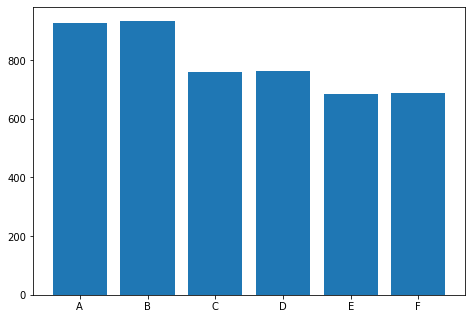

In [7]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(labels,t2dl)
plt.show()

After trying with different sizes for filters and values for strides, some models end up with amount of parameters that could not be trained in collab or in personal computers. The problem seems to be easier and only one convolutional layer was used and tuned. 

In [0]:
def get_conv_model_2D(num_classes,bn=False,neurons=[256,64],compile=True):
    print("using",num_classes,"classes")
    inputs = tf.keras.Input(shape=(40,100,3), name="input_1")
    layers = tf.keras.layers.Conv2D(32,(3,3),  strides=1)(inputs)
    if bn:
        layers = tf.keras.layers.BatchNormalization()(layers)
    layers = tf.keras.layers.Activation('relu')(layers)
    layers = tf.keras.layers.Flatten()(layers)
    layers = tf.keras.layers.Dense(neurons[0], activation=tf.nn.relu)(layers)
    layers = tf.keras.layers.Dense(neurons[1], activation=tf.nn.relu)(layers)
    layers = tf.keras.layers.Dropout(0.2)(layers)
    predictions = tf.keras.layers.Dense(num_classes, activation=tf.nn.softmax, name="output_1")(layers)
    model = tf.keras.Model(inputs = inputs, outputs=predictions)
    if compile:
        model.compile(optimizer='adam',
                      loss='sparse_categorical_crossentropy',
                      metrics=['accuracy'])
    return model

Both, accuracy and loss are saved for displaying in tensorboard. Also, a checkpoint is made for saving the best model in terms of validation accuracy.

In [0]:
def train2D(model, batch_size, epochs, model_name=""):
    tensorboard = tf.keras.callbacks.TensorBoard(log_dir="2D/logs/"+model_name+"_"+"{}".format(time()))
    model.reset_states()
    checkpoint = ModelCheckpoint("2D/"+model_name+".hdf5", monitor='val_accuracy', verbose=1,save_best_only=True, mode='auto', period=1)
    history = model.fit(x_train, y_train, epochs=epochs, callbacks=[tensorboard, checkpoint],
              batch_size=batch_size,
              validation_data=(x_test, y_test))
    metrics = model.evaluate(x_test, y_test)
    return {k:v for k,v in zip (model.metrics_names, metrics)}, history.history

An input of the neural network is consists in 3 images of size 40x100. The first image is the spectrogram computed from an audio of 1 second long. The second and third images are the first and second derivatives of the spectrogram, respectively. 
 


In [0]:
with open('data.pkl','rb') as g: 
    y_train_gender, x_train_gender = pickle.load(g)

In [0]:
models2D = {'A':{'bn':False,'layers':[1024,256],'acc':0,'t':0},'B':{'bn':True,'layers':[1024,256],'acc':0,'t':0},
          'C':{'bn':False,'layers':[512,128],'acc':0,'t':0},'D':{'bn':True,'layers':[512,128],'acc':0,'t':0},
          'E':{'bn':False,'layers':[256,64],'acc':0,'t':0},'F':{'bn':True,'layers':[256,64],'acc':0,'t':0}}

The dataset consists of 1200 audios that were randomly selected from the original database. Form this dataset 80% is used for training and 20% for test in a stratified way. 

In [0]:
x_train, x_test, y_train, y_test = train_test_split(x_train_gender, y_train_gender, test_size=.20,stratify=y_train_gender)
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)
print("\ndistribution of train classes")
print(pd.Series(y_train).value_counts())
print("\ndistribution of test classes")
print(pd.Series(y_test).value_counts())

(999, 40, 100, 3) (999,) (250, 40, 100, 3) (250,)

distribution of train classes
1    520
0    479
dtype: int64

distribution of test classes
1    130
0    120
dtype: int64


In [0]:
for key in models2D:
    start_time = time()
    modelX = get_conv_model_2D(2,models2D[key]['bn'],models2D[key]['layers'])
    print(modelX.summary())
    results, models2D[key]['acc'] = train2D(modelX, batch_size=32, epochs=15, model_name=key)
    models2D[key]['t'] = time() - start_time


using 2 classes
Model: "model_24"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 40, 100, 3)]      0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 38, 98, 32)        896       
_________________________________________________________________
activation_24 (Activation)   (None, 38, 98, 32)        0         
_________________________________________________________________
flatten_24 (Flatten)         (None, 119168)            0         
_________________________________________________________________
dense_48 (Dense)             (None, 1024)              122029056 
_________________________________________________________________
dense_49 (Dense)             (None, 256)               262400    
_________________________________________________________________
dropout_24 (Dropout)         (None, 256)  

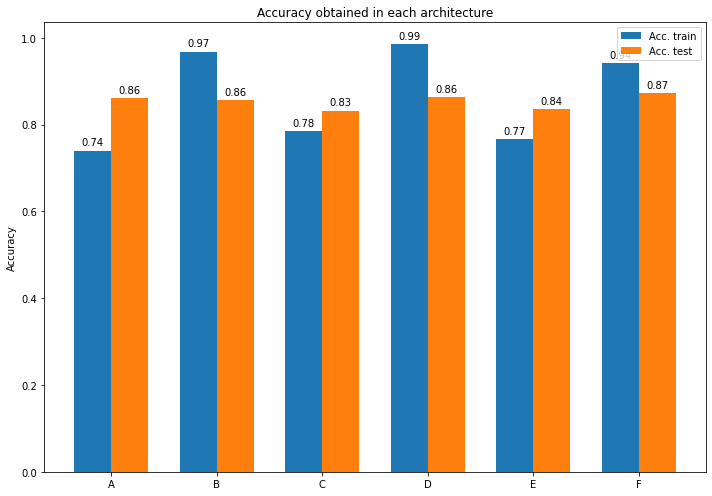

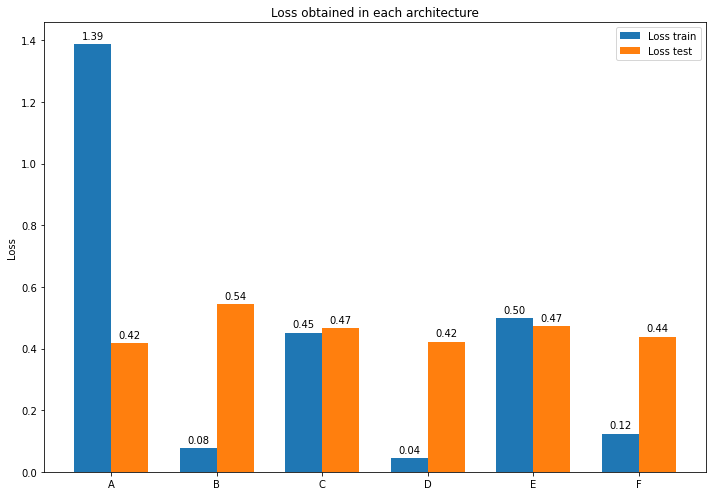

In [0]:
labels=[]
at2=[]
lt2=[]
av2=[]
lv2=[]
t2d=[]
for key in models2D:
    labels.append(key)
    j = models2D[key]['acc']['val_accuracy'].index(max(models2D[key]['acc']['val_accuracy']))
    at2.append(models2D[key]['acc']['accuracy'][j])
    lt2.append(models2D[key]['acc']['loss'][j])
    av2.append(models2D[key]['acc']['val_accuracy'][j])
    lv2.append(models2D[key]['acc']['val_loss'][j])
    t2d.append(models2D[key]['t'])

barplot_model(labels,at2,av2)   
barplot_model(labels,lt2,lv2,ylabel='Loss',title='Loss obtained in each architecture',
              lab1='Loss train',lab2='Loss test')

The execution time of the training of each model is logged.

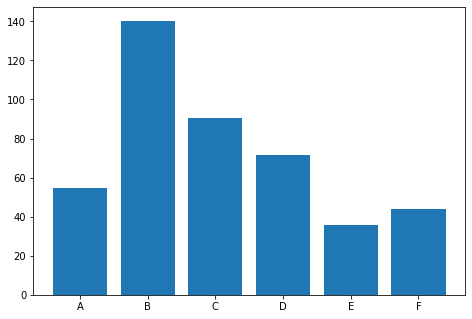

In [0]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(labels,t2d)
plt.show()

# **1D convolution over raw audio signal**

The amount of neurons of the last 2 fully-connected layers is configurable. Three different values are tested in this exercise. Batch normalization is an additional parameter that could be selected.

In [0]:
def get_conv_model_1D(num_classes,bn=False,neurons=[256,64],compile=True):
    print("using",num_classes,"classes")
    inputs = tf.keras.Input(shape=(48000,1), name="input_1")
    layers = tf.keras.layers.Conv1D(40,1800, strides = 240)(inputs)
    if bn:
        layers = tf.keras.layers.BatchNormalization()(layers)
    layers = tf.keras.layers.Activation('relu')(layers)
    layers = tf.keras.layers.Flatten()(layers)
    layers = tf.keras.layers.Dense(neurons[0], activation=tf.nn.relu)(layers)
    layers = tf.keras.layers.Dense(neurons[1], activation=tf.nn.relu)(layers)
    layers = tf.keras.layers.Dropout(0.2)(layers)
    predictions = tf.keras.layers.Dense(num_classes, activation=tf.nn.softmax, name="output_1")(layers)
    model = tf.keras.Model(inputs = inputs, outputs=predictions)
    if compile:
        model.compile(optimizer='adam',
                      loss='sparse_categorical_crossentropy',
                      metrics=['accuracy'])
    return model

    
def train1D(model, batch_size, epochs, model_name=""):
    tensorboard = tf.keras.callbacks.TensorBoard(log_dir="1D/logs/"+model_name+"_"+"{}".format(time()))
    model.reset_states()
    checkpoint = ModelCheckpoint("1D/"+model_name+".hdf5", monitor='val_accuracy', verbose=1,save_best_only=True, mode='auto', period=1)
    history = model.fit(x_train, y_train, epochs=epochs, callbacks=[tensorboard, checkpoint],
              batch_size=batch_size,
              validation_data=(x_test, y_test))
    metrics = model.evaluate(x_test, y_test)
    return {k:v for k,v in zip (model.metrics_names, metrics)}, history.history

In [0]:
with open('data1D.pkl','rb') as g: 
    y_train_gender, x_train_gender = pickle.load(g)

In [0]:
models1D = {'A':{'bn':False,'layers':[1024,256],'acc':0,'t':0},'B':{'bn':True,'layers':[1024,256],'acc':0,'t':0},
          'C':{'bn':False,'layers':[512,128],'acc':0,'t':0},'D':{'bn':True,'layers':[512,128],'acc':0,'t':0},
          'E':{'bn':False,'layers':[256,64],'acc':0,'t':0},'F':{'bn':True,'layers':[256,64],'acc':0,'t':0}}

An input of the neural network consists in one vector of size 48000. This vector is sampled from a one-second long audio that is taken from the second audio of each file. 

In [0]:
x_train, x_test, y_train, y_test = train_test_split(x_train_gender, y_train_gender, test_size=.20,stratify=y_train_gender)
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)
print("\ndistribution of train classes")
print(pd.Series(y_train).value_counts())
print("\ndistribution of test classes")
print(pd.Series(y_test).value_counts())

(1005, 48000, 1) (1005,) (252, 48000, 1) (252,)

distribution of train classes
1    524
0    481
dtype: int64

distribution of test classes
1    131
0    121
dtype: int64


In [0]:

for key in models1D:
    start_time = time()
    modelY = get_conv_model_1D(2,models1D[key]['bn'],models1D[key]['layers'])
    print(modelY.summary())
    results, models1D[key]['acc'] = train1D(modelY, batch_size=32, epochs=15, model_name=key)
    models1D[key]['t'] = time() - start_time
    print(time()-start_time)

using 2 classes
Model: "model_30"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 48000, 1)]        0         
_________________________________________________________________
conv1d_18 (Conv1D)           (None, 193, 40)           72040     
_________________________________________________________________
activation_30 (Activation)   (None, 193, 40)           0         
_________________________________________________________________
flatten_30 (Flatten)         (None, 7720)              0         
_________________________________________________________________
dense_60 (Dense)             (None, 1024)              7906304   
_________________________________________________________________
dense_61 (Dense)             (None, 256)               262400    
_________________________________________________________________
dropout_30 (Dropout)         (None, 256)  

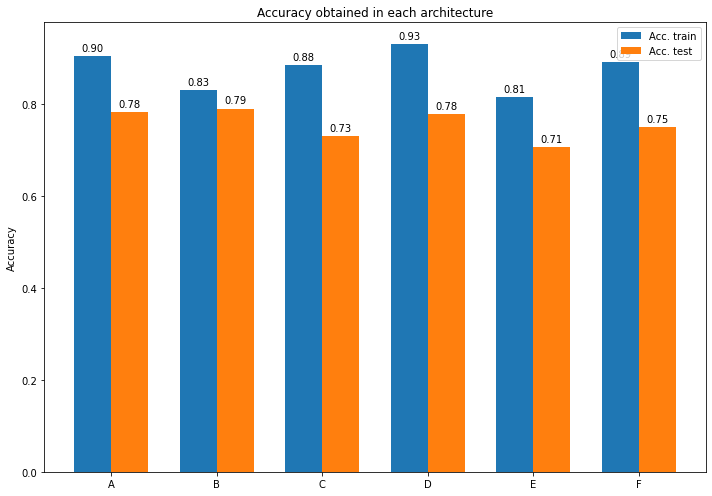

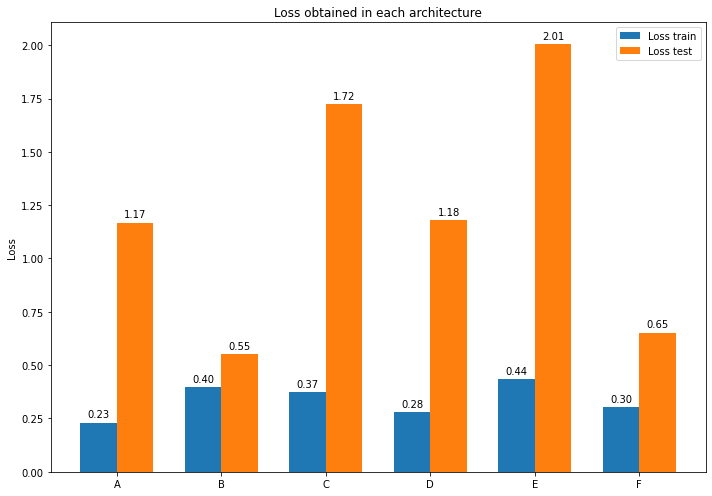

In [0]:
labels=[]
at1=[]
lt1=[]
av1=[]
lv1=[]
t1d=[]
for key in models1D:
    labels.append(key)
    i = models1D[key]['acc']['val_accuracy'].index(max(models1D[key]['acc']['val_accuracy']))
    at1.append(models1D[key]['acc']['accuracy'][i])
    lt1.append(models1D[key]['acc']['loss'][i])
    av1.append(models1D[key]['acc']['val_accuracy'][i])
    lv1.append(models1D[key]['acc']['val_loss'][i])
    t1d.append(models1D[key]['t'])

barplot_model(labels,at1,av1)   
barplot_model(labels,lt1,lv1,ylabel='Loss',title='Loss obtained in each architecture',
              lab1='Loss train',lab2='Loss test')

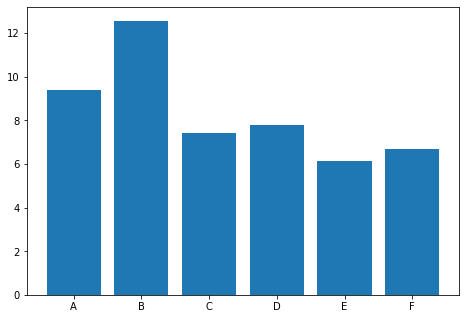

In [0]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(labels,t1d)
plt.show()

A comparison of execution time of equivalent 1D and 2D models

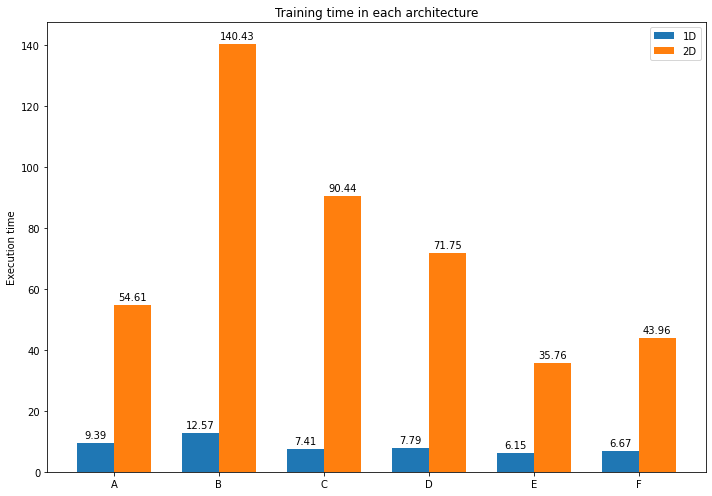

In [0]:
barplot_model(labels,t1d,t2d,ylabel='Execution time',
                       title='Training time in each architecture', 
                  lab1='1D',lab2='2D')